In [43]:
# install igraph package
!apt install libcairo2-dev
!pip install pycairo
!pip install python-igraph

'apt' is not recognized as an internal or external command,
operable program or batch file.


You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


1. Ask ChatGPT to write a 150-200 word summary on an application of network science and then comment/evaluate this answer in your own words in 3-4 sentences based on what you have learned in class. Please also copy the ChatGPT output into the notebook.

An intriguing application of network science lies in the analysis and understanding of complex systems, including social networks, transportation systems, and biological networks. Network science provides a framework to study the interconnectedness and patterns within these systems, unraveling their inherent structure, dynamics, and emergent properties.

One notable application of network science is in the field of social network analysis. By representing individuals as nodes and their relationships as edges, researchers can analyze and model social networks to gain insights into information diffusion, influence propagation, community detection, and the spread of behaviors and diseases. This has practical implications for marketing strategies, public health interventions, and understanding societal dynamics.

Additionally, network science plays a crucial role in studying transportation systems. By modeling transportation networks as graphs, researchers can analyze traffic flow, optimize routes, and identify critical points for infrastructure improvements. This helps in managing congestion, enhancing transportation efficiency, and developing sustainable urban planning strategies.

Another exciting area of application is in the study of biological networks. By mapping biological interactions, such as protein-protein interactions or gene regulatory networks, researchers can gain insights into the functioning of biological systems, identify key biomarkers, and understand the mechanisms underlying diseases. This knowledge has significant implications for drug discovery, personalized medicine, and understanding complex biological phenomena.

Overall, the application of network science provides valuable tools and methodologies for understanding the structure and dynamics of complex systems, enabling us to make informed decisions and design interventions for a wide range of fields, from social sciences to transportation and biology.


My words:
The provided answer offers a concise and accurate summary of the application of network science. It recognizes the significance of network science in analyzing and understanding complex systems such as social networks, transportation systems, and biological networks. It mentions key concepts like information diffusion, influence propagation, community detection, traffic flow analysis, and biological interactions. Overall, the response demonstrates a clear understanding of network science's wide-ranging applications and highlights its relevance in various fields.

2.
a) Write a function to generate the BA model when m=2 and power=1, visualize the degree distribution and fit the degree distribution with a power-law to get the exponent.


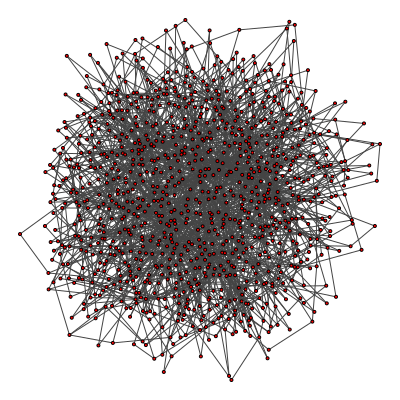

In [44]:
import igraph as ig
import numpy as np

def BA_generator(n):
    G = ig.Graph(n=3)
    G.add_edges([(0,1), (0,2)])

    for i in range(3, n):
        degrees = np.array(G.degree())
        probabilities = degrees / degrees.sum()  # probability is proportional to node degree
        new_edges = np.random.choice(a=np.arange(i), size=2, p=probabilities, replace=False)  # pick m=2 nodes
        G.add_vertex()
        G.add_edges([(i, node) for node in new_edges])  # add edges to the new node

    return G

G = BA_generator(1000)
ig.plot(G, bbox=(400, 400), vertex_size=3)


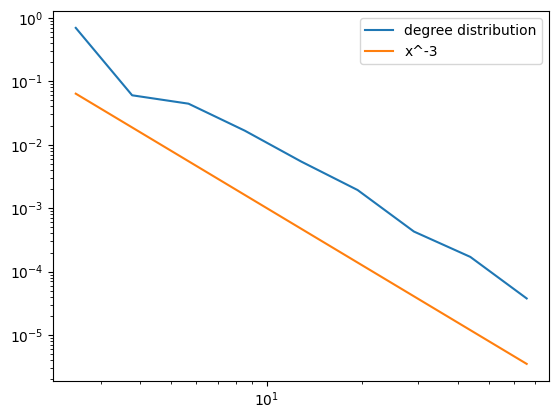

In [45]:
from matplotlib import pyplot as plt
import numpy as np

deg_dis = G.vs.degree()
max_degree = np.max(deg_dis)
hist, bin_edges = np.histogram(deg_dis, bins=np.logspace(np.log10(2), np.log10(max_degree), 10), density=True)
bin_center = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.plot(bin_center, hist, label='degree distribution')
plt.plot(bin_center, bin_center ** (-3), label='x^-3')

plt.xscale('log')
plt.yscale('log')

# Add legend
plt.legend()

# Show the plot
plt.show()


b) On slides 19 and 21 of the lecture notes, we saw that the original BA model does not reproduce the empirically observed results for the power-law exponents. Several BA extensions were suggested to improve this (slide 29). In this question, `please write a new generator that involves the aging effect.`

The aging effect means:
$$\Pi(k_i, t - t_i) = k(t-t_i)^{-\nu}$$
where $t_i$ is the time node i was added to the network. Hence, $t−t_i$ is the node’s age.

In [57]:
import igraph as ig
import numpy as np

def extend_BA_generator(n, nu):
    G = ig.Graph(n=2, edges=[(0, 1)])
    age = np.zeros(n)

    for i in range(2, n):
        G.add_vertices(1)
        age[:i] += 1

        powAge = age[:i] ** -nu
        degree = G.vs.degree()[:i]
        prob = degree * powAge
        normProb = prob / prob.sum()

        new_edges = set()
        while len(new_edges) < 2:
            new_node = np.random.choice(a=np.arange(i), p=normProb)
            new_edges.add(new_node)

        G.add_edges([(i, node) for node in new_edges])

    return G


Using your generator, generate the networks with n=20, $\nu$ = -10, -0.5, 0, 0.5, 10. Visualize the networks by a circular layout. What is the difference between them? How would aging affect $\gamma$? For each condition ($\nu$ < 0, $\nu$ > 0), give a real-world example.

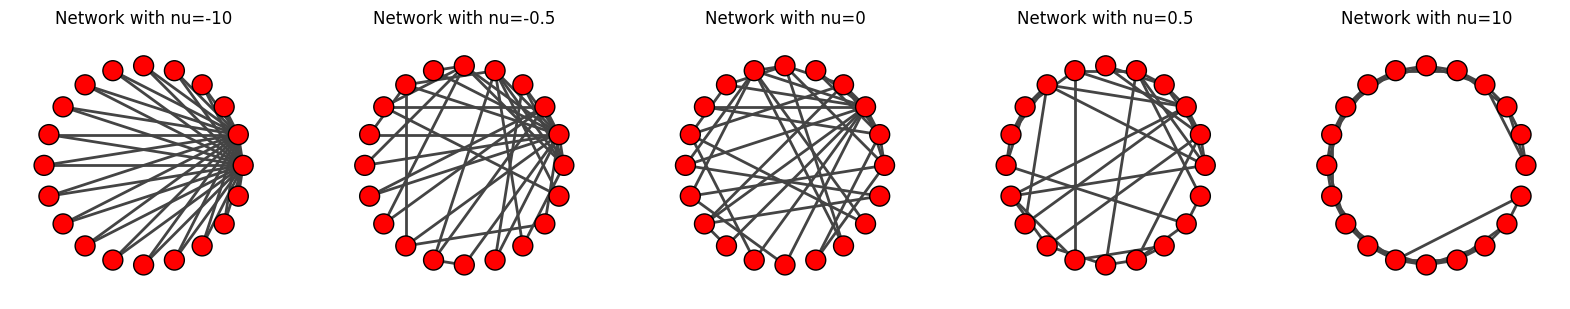

In [67]:
import matplotlib.pyplot as plt

nu_values = [-10, -0.5, 0, 0.5, 10]
n = 20
graphs = []

for nu in nu_values:
    G = extend_BA_generator(n, nu)
    graphs.append(G)

# Visualization
fig, axes = plt.subplots(1, len(nu_values), figsize=(20, 4))
for i, graph in enumerate(graphs):
    layout = graph.layout("circle")
    ig.plot(graph, target=axes[i], layout=layout)
    axes[i].set_title(f"Network with nu={nu_values[i]}")
plt.show()


In the visualized networks, you can observe the effects of the parameter $\nu$ on the structure of the networks. When $\nu$ is negative, the older vertices tend to have a higher degree, meaning they are more connected. This reflects a "rich-get-richer" or preferential attachment mechanism, resulting in a skewed degree distribution with a few nodes having a very high degree, as often seen in real-world networks like the WWW.

When $\nu$ is positive, however, the younger vertices have higher degrees as they are preferentially attached to. This results in a more evenly distributed network where degrees are more uniformly spread across nodes.

As for the effect on $\gamma$, the power law exponent of the degree distribution, it is expected that a negative $\nu$ will result in a larger $\gamma$, reflecting the heavy-tailed nature of the degree distribution. A positive $\nu$, on the other hand, would lead to a smaller $\gamma$, indicating a more even degree distribution.

Real-world examples of networks with $\nu<0$ could include the World Wide Web, where new websites tend to link to well-established sites, or social networks, where new users tend to follow popular profiles.

For $\nu>0$, one can think of examples like a young academic field, where newer articles (vertices) might have more citations (edges) because the field is rapidly developing and the newer findings are more relevant. Or consider a recent social media app, where newer posts or users might quickly gain more likes or followers due to the high user engagement and rapid content generation typical of such platforms.


3. Choose a destination from Tel Aviv (TLV) that you can only reach with connecting flights.
* Determine the shortest path length.

* Targetly remove airports from the network with the highest degree (network hubs) and plot the shortest path vs the number of removed nodes.

* Plot in the same graph the shortest path if network nodes are removed randomly. Compare your result with the findings obtained for betweenness, and discuss your observation in 2-3 sentences.

In [103]:
import pandas as pd
names = ('airline,airline_id,'
         'source,source_id,'
         'dest,dest_id,'
         'codeshare,stops,equipment').split(',')
routes = pd.read_csv(
    'https://github.com/ipython-books/'
    'cookbook-2nd-data/blob/master/'
    'routes.dat?raw=true',
    names=names,
    header=None)
routes


,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [102]:
G_airtraffic = ig.Graph.DataFrame(routes.loc[:, ['source', 'dest']], use_vids=False)

#ig.plot(G_airtraffic, bbox=(400, 400), vertex_size=3)
print(len(G_airtraffic.vs))
print(len(G_airtraffic.es))
G_airtraffic.summary()

3425
67663


'IGRAPH DN-- 3425 67663 -- \n+ attr: name (v)'

In [114]:
TLV = G_airtraffic.vs.find(name='TLV').index
QFN = G_airtraffic.vs.find(name='QFN').index

print(G_airtraffic.shortest_paths(source=G_airtraffic.vs[TLV], target=G_airtraffic.vs[QFN]))
G_airtraffic.get_shortest_paths(G_airtraffic.vs[TLV],to=G_airtraffic.vs[QFN])
G_airtraffic.get_all_shortest_paths(G_airtraffic.vs[TLV],to=G_airtraffic.vs[QFN])


[[8]]


C:\Users\user\AppData\Local\Temp\ipykernel_29716\2162848460.py:4: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead
  print(G_airtraffic.shortest_paths(source=G_airtraffic.vs[TLV], target=G_airtraffic.vs[QFN]))


[[347, 680, 2370, 2376, 2386, 2387, 2393, 2406, 2405],
 [347, 680, 2370, 2376, 2386, 2387, 2393, 2406, 2405]]

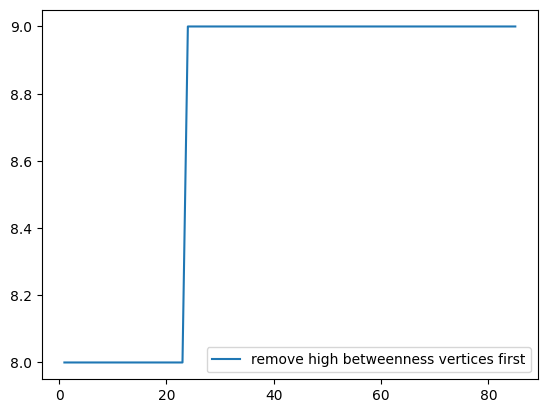

In [121]:
# Define the source and target airports
source = 'TLV'
target = 'QFN'

# Define a function to remove a node from the graph by its name
def remove_node(G, name):
    G.delete_vertices(G.vs.find(name = name))

# Create a copy of the original graph
G_air_copy = G_airtraffic.copy()

# Calculate the closeness centrality of each node
betweenness = np.array(G_air_copy.betweenness())

# Obtain a list of nodes sorted by their closeness   centrality in descending order
node_list = np.argsort(betweenness)[::-1]
sorted_name = G_air_copy.vs[list(node_list)]['name']

# Initialize lists to store the number of removed vertices and the corresponding shortest path length
num_removed_v = []
shortest_path_bet = []

# Iterate over each node in the sorted list
for i in range(len(node_list)):
    # Skip the source and target nodes
    if sorted_name[i] == source or sorted_name[i] == target:
        continue

    # Remove the node from the graph
    remove_node(G_air_copy, sorted_name[i])

    # Calculate the shortest path from the source to the target
    sp = G_air_copy.distances(
        G_air_copy.vs.find(name=source),
        G_air_copy.vs.find(name=target),)
    sp = sp[0]

    # Store the number of removed vertices and the shortest path length
    num_removed_v.append(i+1)
    shortest_path_bet.append(sp)

    # Break the loop if the shortest path becomes infinite (i.e., the source and target nodes are no longer connected)
    if sp == np.inf:
        break

# Plot the shortest path length against the number of removed vertices
plt.plot(num_removed_v, shortest_path_bet, label="remove high betweenness vertices first")
plt.legend()
plt.show()


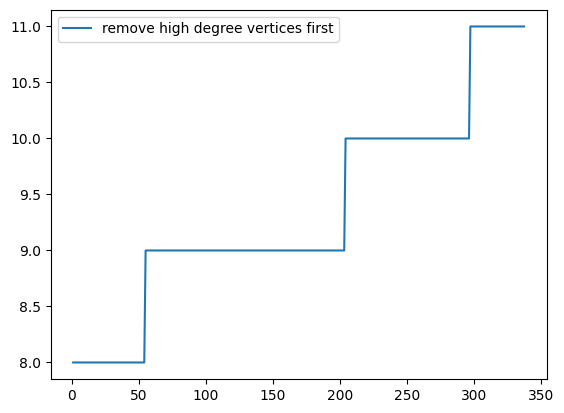

In [116]:
# Define source and target airports
source = 'TLV'
target = 'QFN'

# Define a function to remove a node from the graph by its name
def remove_node(G, name):
    G.delete_vertices(G.vs.find(name = name))

# Create a copy of the original graph
G_air_copy = G_airtraffic.copy()

# Calculate the degree of each node
degree = np.array(G_air_copy.degree())

# Obtain a list of nodes sorted by their degree in descending order
node_list = np.argsort(degree)[::-1]
sorted_name = G_air_copy.vs[list(node_list)]['name']

# Initialize lists to store the number of removed vertices and the corresponding shortest path length
num_removed_v = []
shortest_path_deg = []

# Iterate over each node in the sorted list
for i in range(len(node_list)):
    # Skip the source and target nodes
    if sorted_name[i] == source or sorted_name[i] == target:
        continue

    # Remove the node from the graph
    remove_node(G_air_copy, sorted_name[i])

    # Calculate the shortest path from the source to the target
    sp = G_air_copy.distances(
        G_air_copy.vs.find(name=source),
        G_air_copy.vs.find(name=target),)
    sp = sp[0]

    # Store the number of removed vertices and the shortest path length
    num_removed_v.append(i+1)
    shortest_path_deg.append(sp)

    # Break the loop if the shortest path becomes infinite (i.e., the source and target nodes are no longer connected)
    if sp == np.inf:
        break

# Plot the shortest path length against the number of removed vertices
plt.plot(num_removed_v, shortest_path_deg, label="remove high degree vertices first")
plt.legend()
plt.show()


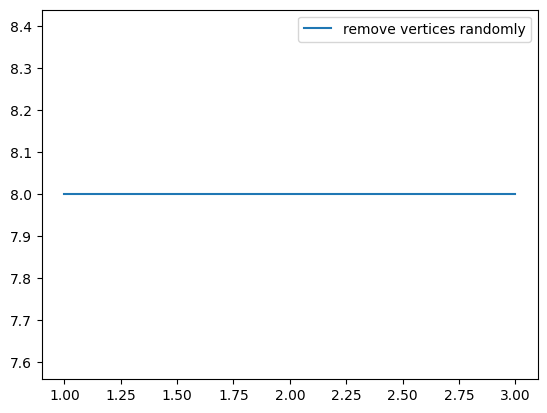

In [120]:
source = 'TLV'
target = 'QFN'

def remove_node(G, name):
    G.delete_vertices(G.vs.find(name = name))

G_air_copy = G_airtraffic.copy()

rand = np.random.permutation(len(G_airtraffic.vs))
node_list = np.argsort(rand)[::-1]
sorted_name = G_air_copy.vs[list(node_list)]['name']
num_removed_v = []
shortest_path_rand = []
for i in range(len(node_list)):
    if sorted_name[i] == source or sorted_name[i] == target:
        continue
    remove_node(G_air_copy, sorted_name[i])

    sp = G_air_copy.distances(
        G_air_copy.vs.find(name=source),
        G_air_copy.vs.find(name=target),)
    sp = sp[0]

    num_removed_v.append(i+1)
    shortest_path_rand.append(sp)
    if sp == np.inf:
        break


plt.plot(num_removed_v, shortest_path_rand, label="remove vertices randomly")
plt.legend()
plt.show()

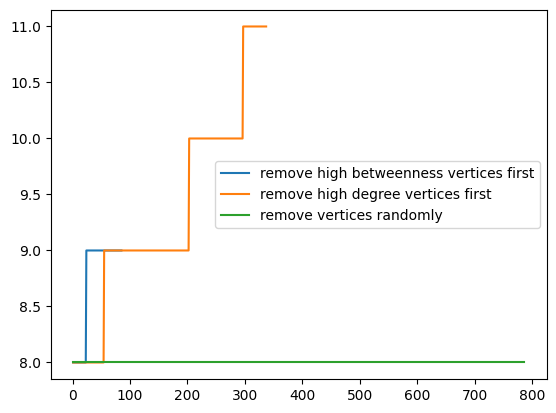

In [119]:
plt.plot(num_removed_v, shortest_path_bet, label="remove high betweenness vertices first")
plt.plot(num_removed_v, shortest_path_deg, label="remove high degree vertices first")
plt.plot(num_removed_v, shortest_path_rand, label="remove vertices randomly")
plt.legend()
plt.show()